In [31]:
# Don't change this cell; just run it. 
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import random
plt.style.use('ggplot')
import matplotlib.ticker as ticker
from PIL import Image
import urllib

In [39]:
df = pd.read_csv("AllComp.csv")


In [40]:
df

,Player,Span,PerformanceAst,Per 90 MinutesAst,Per 90 MinutesG+A,Per 90 MinutesG+A-PK,ExpectedxG,ExpectednpxG,ExpectedxA,ExpectednpxG+xA,...,CarriesPrgDist,CarriesProg,Carries44564,CarriesCPA,CarriesMis,CarriesDis,ReceivingTarg,ReceivingRec,ReceivingRec%,ReceivingProg
0,Albert Rusnák,2022,0.00,0.00,0.13,0.13,0.09,0.09,0.07,0.16,...,146.8,6.08,2.46,0.34,0.60,0.91,52.5,49.7,94.7,2.41
1,Nicolás Lodeiro,2022,0.29,0.29,0.53,0.34,0.24,0.09,0.26,0.35,...,149.6,7.54,2.51,0.24,2.08,1.93,75.6,66.6,88.1,5.75
2,João Paulo Mior,2022,0.00,0.00,0.20,0.20,0.06,0.06,0.04,0.08,...,95.0,2.80,1.00,0.00,1.00,0.40,57.6,55.8,96.9,0.40
3,Danny Leyva,2022,0.14,0.15,0.15,0.15,0.03,0.03,0.07,0.10,...,100.0,3.48,1.74,0.29,1.01,0.87,51.7,49.3,95.2,0.72
4,Joshua Atencio,2022,0.00,0.00,0.00,0.00,0.07,0.07,0.04,0.11,...,103.6,3.21,2.50,0.00,0.71,0.00,56.1,53.2,94.9,2.14
5,Albert Rusnák,2021,0.21,0.21,0.53,0.44,0.24,0.17,0.21,0.39,...,115.5,6.21,2.19,0.83,1.09,0.92,45.0,38.9,86.3,4.64
6,og3,6066,0.29,0.29,0.86,0.67,0.39,0.24,0.37,0.59,...,391.4,16.42,5.97,0.58,3.68,3.24,185.7,172.1,279.7,8.56
7,new3,6065,0.35,0.36,0.68,0.59,0.34,0.27,0.32,0.60,...,319.1,12.90,6.43,1.12,2.81,1.79,152.8,141.4,276.4,7.50


In [57]:
plt.rcParams["figure.figsize"] = (30,10)
plt.rcParams.update({'font.size': 15})
#cols = df.columns
cols = ['StandardSh/90', 'Ast','DribblesSucc%', 'KP', 'Pass TypesTB', 'TacklesTkl',
        'BlocksBlocks', 'Int', 'CarriesCPA']
rusStats = []
lodStats = []
colStats = []
for i in range(len(cols)):
    if isinstance(df[cols[i]][0], (int, float)):
        dif = (df[cols[i]][6]-df[cols[i]][7])*100/df[cols[i]][6:8].sum()
        if (dif<30):# and (len(colStats)<5):# and (df[cols[i]][0]>5):
            if ("%" in cols[i]):
                rusStats.append(df[cols[i]][6]/100)
                lodStats.append(df[cols[i]][7]/100)
                colStats.append(cols[i])
                #plt.bar(cols[i],df[cols[i]][0]/100, color="blue")
                #plt.bar(cols[i],df[cols[i]][1]/100, color="green")
            else:
                rusStats.append(df[cols[i]][6])
                lodStats.append(df[cols[i]][7])
                colStats.append(cols[i])
#                plt.bar(cols[i],df[cols[i]][0], color="blue")
#                plt.bar(cols[i],df[cols[i]][1], color="green")

print(colStats)

['StandardSh/90', 'Ast', 'DribblesSucc%', 'KP', 'Pass TypesTB', 'TacklesTkl', 'BlocksBlocks', 'Int', 'CarriesCPA']


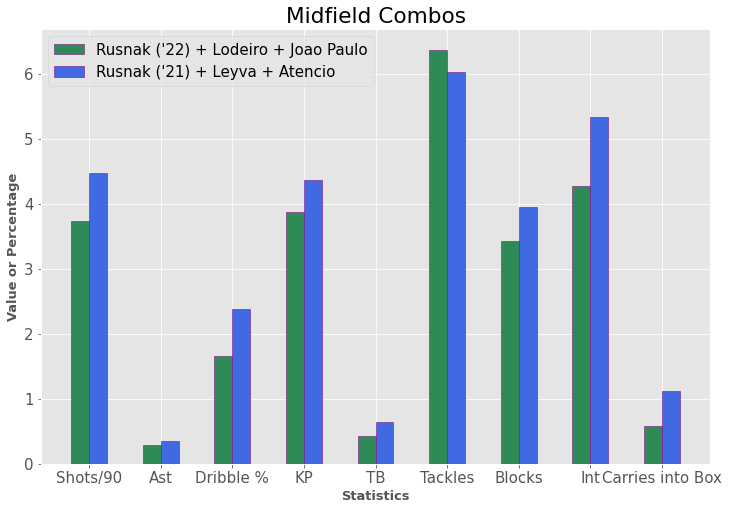

In [58]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
colStats = ['Shots/90', 'Ast','Dribble %', 'KP', 'TB', 'Tackles', 'Blocks', 'Int', 'Carries into Box']
# set height of bar
IT = [12, 30, 1, 8, 22]
ECE = [28, 6, 16, 5, 10]
CSE = [29, 3, 24, 25, 17]

# Set position of bar on X axis
br1 = np.arange(len(rusStats))
br2 = [x + barWidth for x in br1]
#br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, rusStats, color ='seagreen', width = barWidth,
		edgecolor ='purple', label ="Rusnak ('22) + Lodeiro + Joao Paulo")
plt.bar(br2, lodStats, color ='royalblue', width = barWidth,
		edgecolor ='purple', label ="Rusnak ('21) + Leyva + Atencio")
#plt.bar(br3, CSE, color ='b', width = barWidth,
#		edgecolor ='grey', label ='CSE')

# Adding Xticks
plt.xlabel('Statistics', fontweight ='bold', fontsize = 13)
plt.ylabel('Value or Percentage', fontweight ='bold', fontsize = 13)
plt.title("Midfield Combos")
plt.xticks([r + barWidth/2 for r in range(len(rusStats))], colStats)
#		['2015', '2016', '2017', '2018', '2019'])

plt.legend()
plt.show()


new3 are better: ['PerformanceAst', 'Per 90 MinutesAst', 'ExpectednpxG', 'StandardSh', 'StandardSh/90', 'StandardDist', 'ExpectednpxG.1', 'Ast', 'KP', 'Pass TypesTB', 'TacklesMid 3rd', 'Vs DribblesTkl%', 'PressuresMid 3rd', 'BlocksBlocks', 'BlocksPass', 'Int', 'DribblesSucc', 'DribblesSucc%', 'Dribbles#Pl', 'CarriesCPA']

old3 are better: ['Per 90 MinutesG+A', 'Per 90 MinutesG+A-PK', 'ExpectedxG', 'ExpectedxA', 'Per 90 MinutesxG', 'Per 90 MinutesxG+xA', 'ExpectedxG.1', 'ExpectednpxG/Sh', 'ExpectedG-xG', 'Expectednp:G-xG', 'TotalCmp', 'TotalAtt', 'TotalTotDist', 'TotalPrgDist', 'MediumCmp', 'MediumAtt', 'LongCmp', 'LongAtt', 'xA', 'A-xA', 'PPA', 'CrsPA', 'Prog', 'Att', 'Pass TypesLive', 'Pass TypesDead', 'Pass TypesFK', 'Pass TypesPress', 'Pass TypesCrs', 'Pass TypesCK', 'HeightGround', 'HeightHigh', 'OutcomesCmp', 'OutcomesOff', 'OutcomesOut', 'OutcomesInt', 'OutcomesBlocks', 'SCASCA90', 'TacklesDef 3rd', 'TacklesAtt 3rd', 'Vs DribblesAtt', 'Vs DribblesPast', 'PressuresAtt 3rd', 'BlocksSh', 'Clr', 'TouchesTouches', 'TouchesDef Pen', 'TouchesDef 3rd', 'TouchesAtt 3rd', 'TouchesAtt Pen', 'TouchesLive', 'CarriesCarries', 'CarriesTotDist', 'CarriesPrgDist', 'CarriesProg', 'CarriesMis', 'CarriesDis', 'ReceivingTarg', 'ReceivingRec', 'ReceivingProg']
